# Documentation for Model.ipynb



## Introduction

This notebook performs data analysis and builds machine learning models to predict heart disease. The dataset used contains various health-related attributes. The steps include data exploration, preprocessing, feature selection, and model training using different algorithms.

## Libraries and Data Loading

First, the necessary libraries are imported, and the dataset is loaded.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline



The dataset is loaded, and the first few rows are displayed.



In [2]:
df = pd.read_excel(r'data.xlsx', engine='openpyxl')
df.head(10)

,Name,Gender,Age,Height (cm),Weight (kg),Waist (cm),Smoking,Alcohol,Sleep Duration,Sleep Disturbances,...,Chest Pain,Exercise Angina,Swelling,Heartburn/Vomiting,Decreasing Exercise Tolerance,ECG Results,Old Peak (ST Depression),ST Slope,Echocardiogram,Heart Disease Confirmation
0,Dorothy Reid,Female,30,154.3,60.3,80.2,No,No,6-7 hours,No,...,No,No,No,Yes,No,ST-T wave abnormality,0.6,Down,Abnormal,No heart disease
1,Harold Gomez,Female,60,172.1,94.6,95.4,No,Occasionally,6-7 hours,No,...,No,Yes,No,No,No,ST-T wave abnormality,0.6,Down,Abnormal,No heart disease
2,Gabriel Wheeler,Male,55,181.5,65.4,78.4,Occasionally,Occasionally,4-5 hours,No,...,No,No,No,No,No,Normal,1.3,Flat,Normal,No heart disease
3,Darren Harrison,Male,56,172.5,81.5,86.0,No,No,<4 hours,Yes,...,No,Yes,No,No,No,Normal,1.4,Flat,Abnormal,No heart disease
4,Michelle Aguilar,Male,63,180.2,66.6,86.1,No,No,6-7 hours,No,...,No,No,No,No,No,LVH,0.1,Flat,Abnormal,No heart disease
5,Michael Valencia,Female,35,178.1,77.3,100.6,Occasionally,No,6-7 hours,Yes,...,No,Yes,No,No,No,LVH,1.0,Down,Normal,Heart disease present
6,Kimberly Henry,Female,53,161.5,70.7,81.1,No,No,4-5 hours,No,...,No,No,Yes,No,No,ST-T wave abnormality,0.6,Up,Normal,No heart disease
7,Jonathan Mcmahon,Female,39,161.2,74.2,74.6,Heavy smoker,No,8 hours,Yes,...,3,No,No,No,No,ST-T wave abnormality,1.8,Flat,Normal,No heart disease
8,John Lee,Female,54,162.2,78.9,82.2,No,Daily,6-7 hours,No,...,2,Yes,Yes,Yes,No,ST-T wave abnormality,0.7,Down,Normal,No heart disease
9,Chelsea Larson,Female,30,179.6,75.9,93.6,No,No,6-7 hours,Yes,...,No,No,No,No,No,LVH,0.7,Flat,Normal,Heart disease present




## Data Exploration

The categorical columns in the dataset are identified.



In [3]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Name', 'Gender', 'Smoking', 'Alcohol', 'Sleep Duration',
       'Sleep Disturbances', 'Physical Activity', 'Stress Level', 'Diabetes',
       'Asthma', 'COVID-19 History', 'Heart Disease History',
       'Family Heart Disease History', 'Thyroid Condition', 'COPD',
       'Hospital Admissions', 'Skin Color Change', 'Chest Pain',
       'Exercise Angina', 'Swelling', 'Heartburn/Vomiting',
       'Decreasing Exercise Tolerance', 'ECG Results', 'ST Slope',
       'Echocardiogram', 'Heart Disease Confirmation'],
      dtype='object')




## Data Processing

The numerical columns are scaled to standardize them.



In [4]:
numeric_columns = ["Age", "Height (cm)", "Weight (kg)", "Waist (cm)", "Systolic BP", "Diastolic BP", 
                   "Total Cholesterol (mg/dL)", "Triglycerides (TG) (mg/dL)", "LDL (mg/dL)", 
                   "HDL (mg/dL)", "Blood Sugar (Fasting) (mg/dL)", "Blood Sugar (After-fasting) (mg/dL)",
                   "HbA1c (%)", "Max Heart Rate", "Old Peak (ST Depression)"]

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head(10)

,Name,Gender,Age,Height (cm),Weight (kg),Waist (cm),Smoking,Alcohol,Sleep Duration,Sleep Disturbances,...,Chest Pain,Exercise Angina,Swelling,Heartburn/Vomiting,Decreasing Exercise Tolerance,ECG Results,Old Peak (ST Depression),ST Slope,Echocardiogram,Heart Disease Confirmation
0,Dorothy Reid,Female,-1.132614,-1.519822,-0.611738,-0.476791,No,No,6-7 hours,No,...,No,No,No,Yes,No,ST-T wave abnormality,-0.861950,Down,Abnormal,No heart disease
1,Harold Gomez,Female,0.597801,0.251416,1.607846,0.800747,No,Occasionally,6-7 hours,No,...,No,Yes,No,No,No,ST-T wave abnormality,-0.861950,Down,Abnormal,No heart disease
2,Gabriel Wheeler,Male,0.309398,1.186790,-0.281712,-0.628078,Occasionally,Occasionally,4-5 hours,No,...,No,No,No,No,No,Normal,0.534082,Flat,Normal,No heart disease
3,Darren Harrison,Male,0.367079,0.291219,0.760133,0.010691,No,No,<4 hours,Yes,...,No,Yes,No,No,No,Normal,0.733515,Flat,Abnormal,No heart disease
4,Michelle Aguilar,Male,0.770842,1.057429,-0.204059,0.019096,No,No,6-7 hours,No,...,No,No,No,No,No,LVH,-1.859116,Flat,Abnormal,No heart disease
5,Michael Valencia,Female,-0.844212,0.848463,0.488347,1.237800,Occasionally,No,6-7 hours,Yes,...,No,Yes,No,No,No,LVH,-0.064217,Down,Normal,Heart disease present
6,Kimberly Henry,Female,0.194037,-0.803366,0.061255,-0.401147,No,No,4-5 hours,No,...,No,No,Yes,No,No,ST-T wave abnormality,-0.861950,Up,Normal,No heart disease
7,Jonathan Mcmahon,Female,-0.613490,-0.833218,0.287744,-0.947463,Heavy smoker,No,8 hours,Yes,...,3,No,No,No,No,ST-T wave abnormality,1.531248,Flat,Normal,No heart disease
8,John Lee,Female,0.251718,-0.733711,0.591885,-0.308694,No,Daily,6-7 hours,No,...,2,Yes,Yes,Yes,No,ST-T wave abnormality,-0.662517,Down,Normal,No heart disease
9,Chelsea Larson,Female,-1.132614,0.997725,0.397752,0.649460,No,No,6-7 hours,Yes,...,No,No,No,No,No,LVH,-0.662517,Flat,Normal,Heart disease present




Categorical variables are converted into numerical values using one-hot encoding.



In [5]:
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object', 'category']).columns, drop_first=True)
df.head(10)

,Age,Height (cm),Weight (kg),Waist (cm),Systolic BP,Diastolic BP,Total Cholesterol (mg/dL),Triglycerides (TG) (mg/dL),LDL (mg/dL),HDL (mg/dL),...,Exercise Angina_Yes,Swelling_Yes,Heartburn/Vomiting_Yes,Decreasing Exercise Tolerance_Yes,ECG Results_Normal,ECG Results_ST-T wave abnormality,ST Slope_Flat,ST Slope_Up,Echocardiogram_Normal,Heart Disease Confirmation_No heart disease
0,-1.132614,-1.519822,-0.611738,-0.476791,0.149271,-0.004500,-0.611852,-0.138079,-0.945219,0.011413,...,False,False,True,False,False,True,False,False,False,True
1,0.597801,0.251416,1.607846,0.800747,-1.722055,1.179612,0.180340,1.733525,-1.318713,-0.610088,...,True,False,False,False,False,True,False,False,False,True
2,0.309398,1.186790,-0.281712,-0.628078,1.193732,-0.063705,-1.590443,1.593592,-1.715550,1.367416,...,False,False,False,False,True,False,True,False,True,True
3,0.367079,0.291219,0.760133,0.010691,-0.764632,-0.478144,0.529837,-1.187576,0.642129,-1.288090,...,True,False,False,False,True,False,True,False,False,True
4,0.770842,1.057429,-0.204059,0.019096,1.672443,1.238818,-0.868150,1.471150,-1.738893,-1.683591,...,False,False,False,False,False,False,True,False,False,True
5,-0.844212,0.848463,0.488347,1.237800,-0.068325,-0.833378,-1.404045,1.803491,-0.991906,1.536917,...,True,False,False,False,False,False,False,False,True,False
6,0.194037,-0.803366,0.061255,-0.401147,-1.243344,-0.063705,-1.194347,-0.925202,1.622550,-0.553588,...,False,True,False,False,False,True,False,True,True,True
7,-0.613490,-0.833218,0.287744,-0.947463,-1.722055,-1.247817,-1.101148,-0.400453,0.898906,0.067913,...,False,False,False,False,False,True,True,False,True,True
8,0.251718,-0.733711,0.591885,-0.308694,-0.024806,0.232323,-0.774951,-0.103096,0.151919,0.915415,...,True,True,True,False,False,True,False,False,True,True
9,-1.132614,0.997725,0.397752,0.649460,0.584463,-0.537350,1.508428,0.841452,1.435803,1.367416,...,False,False,False,False,False,False,True,False,True,False




## Feature and Target Variables

The features and target variable are separated.



In [6]:
X = df.drop(columns=["Heart Disease Confirmation_No heart disease"])
y = df["Heart Disease Confirmation_No heart disease"]
print(X)

          Age  Height (cm)  Weight (kg)  Waist (cm)  Systolic BP  \
0   -1.132614    -1.519822    -0.611738   -0.476791     0.149271   
1    0.597801     0.251416     1.607846    0.800747    -1.722055   
2    0.309398     1.186790    -0.281712   -0.628078     1.193732   
3    0.367079     0.291219     0.760133    0.010691    -0.764632   
4    0.770842     1.057429    -0.204059    0.019096     1.672443   
..        ...          ...          ...         ...          ...   
495 -1.017253     1.515165    -1.245905    0.456148     0.497424   
496 -0.844212     1.753984     0.507761   -0.619673     0.758540   
497  1.463008     0.947971     0.423636    0.775533    -0.242402   
498  0.597801     0.659398     0.423636    2.212763    -1.504459   
499 -0.036685    -0.166516     1.400771   -1.367705    -1.417420   

     Diastolic BP  Total Cholesterol (mg/dL)  Triglycerides (TG) (mg/dL)  \
0       -0.004500                  -0.611852                   -0.138079   
1        1.179612              



## Correlation Heatmap

A heatmap is plotted to visualize the correlations between features.



In [7]:
# corrmat = df.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))
# sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")



## Logistic Regression Model

The necessary libraries for logistic regression are imported.



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score



The data is split into training and testing sets.



In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



The logistic regression model is initialized and trained on the training data.



In [10]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)



Predictions are made on the test set, and the model's performance is evaluated.



In [11]:
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.72
Confusion Matrix:
 [[ 2 20]
 [ 8 70]]
Classification Report:
               precision    recall  f1-score   support

       False       0.20      0.09      0.12        22
        True       0.78      0.90      0.83        78

    accuracy                           0.72       100
   macro avg       0.49      0.49      0.48       100
weighted avg       0.65      0.72      0.68       100

ROC-AUC Score: 0.4324009324009324




## Adding Interaction Terms

Interaction terms are added to the dataset.



In [12]:
df['Age_Weight'] = df['Age'] * df['Weight (kg)']
df['Cholesterol_BP'] = df['Total Cholesterol (mg/dL)'] * df['Systolic BP']
df['Age_Cholesterol'] = df['Age'] * df['Total Cholesterol (mg/dL)']



## Recursive Feature Elimination (RFE) for Feature Selection

RFE is used to select the top features.



In [13]:
from sklearn.feature_selection import RFE

selector = RFE(LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=15)
selector.fit(X, y)
X_selected = selector.transform(X)



## Split Data into Training and Testing Sets

The selected data is split into training and testing sets.



In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)



## Grid Search for Hyperparameter Tuning (C Parameter)

Grid search is used to find the best regularization strength.



In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
log_reg_best = grid_search.best_estimator_
print("Best C parameter:", grid_search.best_params_)

Best C parameter: {'C': 10}




The best model is used to make predictions and evaluate performance.



In [16]:
y_pred = log_reg_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Default Threshold Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

y_pred_prob = log_reg_best.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

y_pred_adjusted = (y_pred_prob >= 0.4).astype(int)
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
print("Adjusted Threshold Accuracy:", accuracy_adjusted)

conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix with Adjusted Threshold:\n", conf_matrix_adjusted)

class_report_adjusted = classification_report(y_test, y_pred_adjusted)
print("Classification Report with Adjusted Threshold:\n", class_report_adjusted)

Default Threshold Accuracy: 0.78
Confusion Matrix:
 [[ 0 22]
 [ 0 78]]
Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00        22
        True       0.78      1.00      0.88        78

    accuracy                           0.78       100
   macro avg       0.39      0.50      0.44       100
weighted avg       0.61      0.78      0.68       100

ROC-AUC Score: 0.5
Adjusted Threshold Accuracy: 0.78
Confusion Matrix with Adjusted Threshold:
 [[ 0 22]
 [ 0 78]]
Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00        22
        True       0.78      1.00      0.88        78

    accuracy                           0.78       100
   macro avg       0.39      0.50      0.44       100
weighted avg       0.61      0.78      0.68       100



d:\eda project\EDA-PROJ-2\venv-proj2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\eda project\EDA-PROJ-2\venv-proj2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\eda project\EDA-PROJ-2\venv-proj2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\e



## Dataset Using SMOTE

SMOTE is applied to the training data to handle class imbalance.



In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)



## Penalize Misclassification of the Minority Class

Logistic regression is reinitialized with balanced class weights.



In [18]:
log_reg_balanced = LogisticRegression(C=0.01, max_iter=1000, random_state=42, class_weight='balanced')
log_reg_balanced.fit(X_train, y_train)

y_pred_balanced = log_reg_balanced.predict(X_test)
print("Balanced Class Weight Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))
print("Classification Report:\n", classification_report(y_test, y_pred_balanced))

Balanced Class Weight Accuracy: 0.78
Confusion Matrix:
 [[ 0 22]
 [ 0 78]]
Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00        22
        True       0.78      1.00      0.88        78

    accuracy                           0.78       100
   macro avg       0.39      0.50      0.44       100
weighted avg       0.61      0.78      0.68       100



d:\eda project\EDA-PROJ-2\venv-proj2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\eda project\EDA-PROJ-2\venv-proj2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\eda project\EDA-PROJ-2\venv-proj2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




## Random Forest Classifier

A Random Forest Classifier is trained and evaluated.



In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.78
Confusion Matrix:
 [[ 0 22]
 [ 0 78]]
Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00        22
        True       0.78      1.00      0.88        78

    accuracy                           0.78       100
   macro avg       0.39      0.50      0.44       100
weighted avg       0.61      0.78      0.68       100



d:\eda project\EDA-PROJ-2\venv-proj2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\eda project\EDA-PROJ-2\venv-proj2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\eda project\EDA-PROJ-2\venv-proj2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




## K-Nearest Neighbors (KNN)

A KNN model is trained, and the optimal number of neighbors is found.



Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

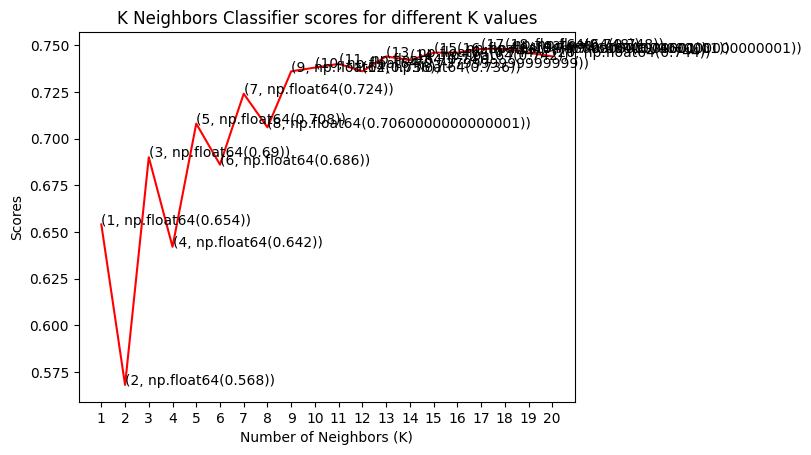

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, X, y, cv=10)
    knn_scores.append(score.mean())

plt.plot([k for k in range(1, 21)], knn_scores, color='red')
for i in range(1, 21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')



The KNN model is trained with the optimal number of neighbors.



In [21]:
knn_classifier = KNeighborsClassifier(n_neighbors=9)
score = cross_val_score(knn_classifier, X, y, cv=10)
score.mean()

np.float64(0.736)



## Random Forest Classifier

A Random Forest Classifier is trained and evaluated.



In [22]:
randomforest_classifier = RandomForestClassifier(n_estimators=10)
score = cross_val_score(randomforest_classifier, X, y, cv=10)
score.mean()

np.float64(0.72)



## Decision Tree Classifier

A Decision Tree Classifier is trained, and its performance is evaluated for different depths.



In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
for i in range(1, 35):
    clf = DecisionTreeClassifier(max_depth=i, random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy at max depth {i} : {accuracy * 100:.2f}%")

Accuracy at max depth 1 : 75.00%
Accuracy at max depth 2 : 75.00%
Accuracy at max depth 3 : 74.00%
Accuracy at max depth 4 : 74.00%
Accuracy at max depth 5 : 71.00%
Accuracy at max depth 6 : 73.00%
Accuracy at max depth 7 : 65.00%
Accuracy at max depth 8 : 67.00%
Accuracy at max depth 9 : 69.00%
Accuracy at max depth 10 : 62.00%
Accuracy at max depth 11 : 70.00%
Accuracy at max depth 12 : 65.00%
Accuracy at max depth 13 : 69.00%
Accuracy at max depth 14 : 69.00%
Accuracy at max depth 15 : 69.00%
Accuracy at max depth 16 : 69.00%
Accuracy at max depth 17 : 69.00%
Accuracy at max depth 18 : 69.00%
Accuracy at max depth 19 : 69.00%
Accuracy at max depth 20 : 69.00%
Accuracy at max depth 21 : 69.00%
Accuracy at max depth 22 : 69.00%
Accuracy at max depth 23 : 69.00%
Accuracy at max depth 24 : 69.00%
Accuracy at max depth 25 : 69.00%
Accuracy at max depth 26 : 69.00%
Accuracy at max depth 27 : 69.00%
Accuracy at max depth 28 : 69.00%
Accuracy at max depth 29 : 69.00%
Accuracy at max depth 3



## Conclusion

This notebook demonstrates the process of data exploration, preprocessing, and model training using various machine learning algorithms to predict heart disease. The models' performances are evaluated, and the results are presented.

